# Рабочая тетрадь №7. Нейронные сети.
###  Алхимов Василий Юрьевич

### Обучение персептрона

Персептрон представляет собой элементарную часть нейронной сети. Одиночный персептрон является линейным бинарным классификатором. В этой лекции мы рассмотрим процедуру обучения персептрона для классификации данных. Поскольку персептрон представляет собой бинарный классификатор, то мы будем рассматривать лишь два класса.

Пусть мы рассматриваем некоторое множество (конечное или бесконечное) n-мерных векторов, которые будем обозначать x=(x_1,x_2,...,x_n)

Будем считать, что это множество разбивается на два класса, которые мы будем обозначать +1 и -1. Поэтому возникает задача построения функции, которая задана на нашем множестве векторов, и принимает значения в множестве {+1,-1}. В качестве такой функции может выступать персептрон. С алгебраической точки зрения персептрон состоит из вектора весов w=(w_0,w_1,w_2,...,w_n).

При этом персептрон работает по формуле

    y=sign(w_0  + x_1 w_1  + x_2 w_2  + ...+ x_n w_n),
где функция sign(t) равна +1, если t ≥ 0, и равна -1, если t < 0.

Приведем алгоритм обучения персептрона. Пусть у нас есть набор обучающих данных {(x,d)}, где x - это различные вектора, а d из множества {+1,-1} указывает к какому классу относится наш вектор.

	Положим вектор весов w равным нулю.

	Повторять N раз следующие шаги:

	Для каждого тестового набора (x,d):

	Вычислить y = sing[(x,w)].

	Если yd < 0, то скорректировать веса w_0  = w_0  + ad,w_i  = w_i  + adx_i,i = 1,2,...,n.

Описанный алгоритм довольно легко программировать.

### 1.1.1 Пример

Задача:

Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным:


In [451]:
class Perceptron:
    def __init__(self,N):
        self.w = list()
        for i in range(N):
            self.w.append(0)
    def calc(self,x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i]*x[i]
        return res
    def sign(self,x):
        if self.calc(x)>0:
            return 1
        else:
            return -1
    def learn(self,la,x,y):
        if y*self.calc(x)<=0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i]+la*y*x[i]
    def learning(self,la,T):
        for n in range(100):
            for t in T:
                self.learn(la,t[0],t[1])

In [452]:
perceptron = Perceptron(2)
la = 0.1
T=list()
T.append([[2,1], 1])
T.append([[3,2], 1])
T.append([[4,1], 1])
T.append([[1,2], -1])
T.append([[2,3], -1])
T.append([[5,7], -1])
perceptron.learning(la,T)
print(perceptron.w)
print (perceptron.sign([1.5, 2]))
print (perceptron.sign([3, 1.5]))
print (perceptron.sign([5, 1]))
print (perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

### Реализация нейронной сети на Python

Нейронная сеть — это функциональная единица машинного или глубокого обучения. Она имитирует поведение человеческого мозга, поскольку основана на концепции биологических нейронных сетей.

Наиболее распространенный тип нейронной сети, называемый многослойным персептроном (MLP), представляет собой функцию, которая отображает входные данные в выходные данные. MLP имеет один входной слой и один выходной слой. Между ними может быть один или несколько скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки. Скрытые слои также могут иметь более одного нейрона. Каждый нейрон представляет собой линейную функцию, к которой применяется функция активации для решения сложных задач. Выход каждого слоя подается в качестве входных данных для всех нейронов следующих слоев.

Нейронные сети способны решать множество задач. В основном они состоят из таких компонентов:

	входной слой (получение и передача данных);

	скрытый слой (вычисление);

	выходной слой. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны. Нейрон одновременно принимает несколько входов, обрабатывает эти данные и выдает один выход. Нейронная сеть представляет собой блоки ввода и вывода, где каждое соединение имеет соответствующие веса (это сила связи нейронов; чем вес больше, тем один нейрон сильнее влияет на другой). Данные всех входов умножаются на веса:

	x → x*w_1;
	y → y*w_2.

    Входы после взвешивания суммируются с прибавлением значения порога «c»:
    xw_1  + yw_2  + c

    Полученное значение пропускается через функцию активации (сигмоиду), которая преобразует входы в один выход:

    z =f(xw_1  + yw_2  + c).


Так выглядит сигмоида:
<div align="сenter">
<img src="https://sun9-west.userapi.com/sun9-2/s/v1/if2/T87FCii9Oasrc1njtvO26iMU-Qk_HjyUGtWxLmK0agcPELUJfdK8cTW1d4N9nga2fJM_-T91oqkEen8dk_bMM2y5.jpg?size=536x373&quality=96&type=album" align="сenter" style="width: 50%"
</div>

        Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа стремятся к нулю, а положительные — к единице.
    Например. Пусть нейрон имеет следующие значения: w = [0,1] c = 4.
    Входной слой: x = 2,y = 3.

    ((xw_1) + (yw_2)) + c = 20 + 31 + 4 = 7.
    z = f(7) = 0.99.

### 1.1.2 Пример
Решение:

Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

In [453]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов.

Пример несложной нейронной сети
<div align="сenter">
<img src="https://sun1.userapi.com/sun1-88/s/v1/if2/h72OOBLmqzvR6Rm78vkVmW9xvs7lpeUwqtkSrbeOWGokh0hikXZlnUSSX7c7cO33VPJxmDn2UNjyex4n4Ft_IvxZ.jpg?size=606x269&quality=96&type=album" align="сenter" style="width: 50%"
</div>

где:

    x_1,x_2 — входной слой;

    h_1,h_2 — скрытый слой с двумя нейронами;

    o_1 — выходной слой.

Например. Представим, что нейроны из графика выше имеют веса [0,1]. Пороговое значение (b) у обоих нейронов равно 0 и они имеют идентичную сигмоиду.
При входных данных x=[2,3] получим:

h_1  = h_2  = f(wx+b) = f((02) + (1*3) +0) = f(3) = 0.95.

o_1  = f(w*[h_1,h_2] +b) = f((0h_1) + (1h_2) +0) = f(0.95) = 0.72.

Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.


In [454]:
import numpy as np
class OurNeuralNetwork:
    '''
    Данные нейросети:
        -два входа
        -два нейрона в скрытых слоях (h1, h2)
        -выход(о1)
    Нейроны имеют идентичные веса и пороги:
        -w = [0,1]
        -b = 0
    '''
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        #Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


###  Обучение нейронной сети

Обучение нейросети — это подбор весов, которые соответствуют всем входам для решения поставленных задач.

Класс нейронной сети:


In [455]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random(4,1)
        self.y = y
        self.output = np.zeros(y.shape)

Каждый этап процесса обучения состоит из:

	прямого распространения (прогнозируемый выход);
	обратного распространения (обновление весов и смещений).

Например:

Дана двуслойная нейросеть:

ŷ = σ(w_2 σ(w_1 x + b_1 )+ b_2 ).

В данном случае на выход ŷ влияют только две переменные — w (веса) и b (смещение). Настройку весов и смещений из данных входа или процесс обучения нейросети можно изобразить так:

<div align="сenter">
<img src="https://sun1.userapi.com/sun1-97/s/v1/if2/GcyBod1PH_fsedLVZK3lWNhDIIRnru72Qli-4mQk5UpzXbJ2WMKEwwMiKWxbE8wGMvi4C0BtTstUrbzHXiC2eGb2.jpg?size=955x104&quality=96&type=album" align="сenter" style="width: 80%"
</div>


#### Прямое распространение.
Как видно, формула прямого распространения представляет собой несложное вычисление:

ŷ = σ(w_2 σ(w_1 x + b_1) + b_2)

Далее необходимо добавить в код функцию прямого распространения. Предположим, что смещения в этом случае будут равны 0.

In [456]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

Чтобы вычислить ошибку прогноза, необходимо использовать функцию потери. В примере уместно воспользоваться формулой суммы квадратов ошибок — средним значением между прогнозируемым и фактическим результатами:

<div align="сenter">
<img src="https://sun1.userapi.com/sun1-13/s/v1/if2/C2OUC0nGC8wj9cgLJaz-B7q9HATrU71wnLEJW6snZOCW3307P7-q2dbF0Z4uk7-6VlziD2NQV6Q_32gA7eaorKou.jpg?size=250x88&quality=96&type=album" align="сenter" style="width: 30%"
</div>



Благодаря этому правилу можно регулировать веса. Добавляем в код Python функцию обратного распространения:

In [457]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output)*sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1)))
        self.weights1 += d_weights1
        self.weights2 += d_weights2

Нейронные сети базируются на определенных алгоритмах и математических функциях. Сначала может казаться, что разобраться в них довольно сложно. Но существуют готовые библиотеки машинного обучения для построения и тренировки нейросетей, позволяющие не углубляться в их устройство.


### Задание

`
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:
	три входа (x_1,x_2,x_3 );
	три нейрона в скрытых слоях (h_1,h_2,h_3);
	выход (o_1).
Нейроны имеют идентичные веса и пороги:
	w = [0.5,0.5,0.5]
	b = 0
Данные нейросети:
	два входа (x_1,x_2);
	два нейрона в скрытых слоях (h_1,h_2);
	два выхода (o_1,o_2 ).
Нейроны имеют идентичные веса и пороги:
	w = [1,0];
	b = 1.
`

In [458]:
import numpy as np
class OurNeuralNetwork:

    def __init__(self):
        weights = np.array([0.5,0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.h3 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2,3,4])
print(network.feedforward(x))


0.8151036049051821


### Задание:

Реализуйте классы нейронных сетей с использованием других функций активации.

<div align="сenter">
<img src="https://sun1.userapi.com/sun1-21/s/v1/if2/JMA4e7_VY474gCimZqC7lhi0KEc60PwPyruh0FnYrFWaVLB-1HpC9uc1-4RKPMAgaivt3cJyxGT9sJUY-A8x52dW.jpg?size=549x576&quality=96&type=album" align="сenter" style="width:40%"
</div>


In [459]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


In [460]:
import numpy as np
def tanh(x):
    return np.tanh(x)
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9999983369439447


In [461]:
import numpy as np
def ReLu(x):
    return max(0,x)
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLu(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))


7


### Введение в нейронные сети с помощью Scikit-Learn в Python

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо
выполнить, чтобы построить простую нейронную сеть с плотными связями.
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы
будем использовать библиотеку Python Scikit-Learn для создания нашей
нейронной сети.

Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:

1. MLPClassifier;
2. MLPRegressor

Начнем с импорта необходимых библиотек.

In [462]:
# Загрузка библиотека
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### MLPClassifier
Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр,
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем
использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор
данных о жилье в Бостоне, который содержит информацию о различных
свойствах дома, таких как среднее количество комнат, уровень преступности
на душу населения в городе и т. д. Мы будем использовать его для задач
регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить
их, вызвав методы load_digits() и load_boston()

In [463]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes: ', X_digits.shape, Y_digits.shape)

Dataset Sizes:  (1797, 64) (1797,)


In [464]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset Sizes: ', X_boston.shape, Y_boston.shape)

Dataset Sizes:  (506, 13) (506,)


c:\users\starw\pycharmprojects\prac1\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

#### Классификация
MLPClassifier — это клвсс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.

Как обычно разделим набор данных на две части:

- данные обучения, которые будут использоваться для модели обучения;
- тестовые данные, по которым будет проверяться точность обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.
Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.

In [465]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [466]:
# Для начала натренируем модель MLPClassifier с параметрами по умолчанию
# для тренировочных данных.

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [467]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# метод score для оценки точноси моделей классификации
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy: 0.983
Training Accuracy: 1.000


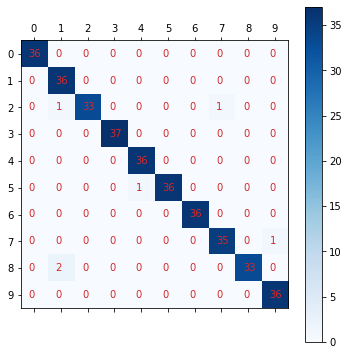

In [468]:
# Cоздадим метод plot_confusion_matrix(), который принимает исходные и
# предсказанные метки данных по модели. Затем он строит матрицу путаницы,
# используя matplotlib

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier,
которые могут предоставить значимую информацию после обучения
модели.

- loss_ — возвращает убыток после завершения процесса обучения.
- coefs_ — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i.
- intercepts_ — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i.
- n_iter_ — количество итераций, для которых выполнялась оценка.
- out_activation_ — возвращает имя функции активации выходного слоя.

In [469]:
print('Loss:', mlp_classifier.loss_)
print('Number of Coefs:', len(mlp_classifier.coefs_))
print('Number of Intercepts:', len(mlp_classifier.intercepts_))
print('Number of Iterations for Which Estimator Ran:', mlp_classifier.n_iter_)
print('Name of Output Layer Activation Function:', mlp_classifier.out_activation_)

Loss: 0.003472868499418059
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for Which Estimator Ran: 125
Name of Output Layer Activation Function: softmax


### MLPRegressor
MLPRegressor — это класс, доступный как часть библиотеки
neuro_network sklearn для выполнения задач регрессии с использованием
многослойного персептрона. Также разделим набор данных на две части:

- данные обучения (80%), которые будут использоваться для модели обучения;
- тестовые данные (20%), по которым будет проверяться точность обученной модели.

In [470]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes: (404, 13) (102, 13) (404,) (102,)


In [471]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [472]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# метод score оценивает точность моделей классификации
print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score : 0.462
Training R^2 Score : 0.510


In [473]:
# MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:
print('Loss:', mlp_regressor.loss_)

Loss: 28.538174061119623


In [474]:
print('Number of Coefs:', len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs: 2


[(13, 100), (100, 1)]

In [475]:
print('Number of Iterations for Which Estimator Ran:', mlp_regressor.n_iter_)
print('Name of Output Layer Activation Function:', mlp_regressor.out_activation_)

Number of Iterations for Which Estimator Ran: 130
Name of Output Layer Activation Function: identity


### 1.2.1 Задание
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv


In [476]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [477]:
from sklearn.datasets import load_iris

digits = load_iris()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes: ', X_digits.shape, Y_digits.shape)


Dataset Sizes:  (150, 4) (150,)


In [478]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (120, 4) (30, 4) (120,) (30,)


In [479]:
# Для начала натренируем модель MLPClassifier с параметрами по умолчанию
# для тренировочных данных.

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

c:\users\starw\pycharmprojects\prac1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=123)

In [480]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# метод score для оценки точноси моделей классификации
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

[1 0 2 2 0 0 2 2 2 0 0 1 2 1 2]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2]
Test Accuracy: 0.933
Training Accuracy: 0.983


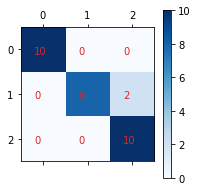

In [481]:
# Cоздадим метод plot_confusion_matrix(), который принимает исходные и
# предсказанные метки данных по модели. Затем он строит матрицу путаницы,
# используя matplotlib

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(3,3))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

### Регрессия

In [485]:
url=r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
salary = pd.read_csv(url)

X_salary = salary.iloc[:, :-1].values
Y_salary = salary.iloc[:, 1].values
print('"salary" Dataset Sizes:',X_salary.shape, Y_salary.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_salary, Y_salary, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test. shape, Y_train.shape, Y_test.shape)

mlp_regressor = MLPRegressor(random_state=123, max_iter=50000)
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
print('Test R*2 Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R*2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

"salary" Dataset Sizes: (30, 1) (30,)
Train/Test Sizes :  (24, 1) (6, 1) (24,) (6,)
[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971  117759.05793283]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R*2 Score : 0.971
Training R*2 Score : 0.948


In [483]:
print("Loss :", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_))
print("Number of Iterations for Which Estimator Ran :", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function :",mlp_regressor.out_activation_)

Loss : 16873681.689960103
Number of Coefs :  2
Number of Iterations for Which Estimator Ran : 30344
Name of Output Layer Activation Function : identity
